### Technical

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score, f1_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
import pickle # for load and save model
import warnings
warnings.filterwarnings('ignore')

### EDA

In [9]:
# importing dataset
data = pd.read_csv('diabetes_data_upload.csv')
data.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


- Polyuria - Полиурия (увеличенное образование мочи)
- Polydipsia - Полидипсия (неутолимая жажда)
- sudden weight loss - внезапная потеря веса
- weakness - слабость
- Polyphagia - Полифагия (повышенный аппетит)
- Genital thrush - Генитальная молочница
- visual blurring - визуальное размытие
- Itching - Зуд
- Irritability - Раздражительность
- delayed healing - Долгое заживление
- partial paresis - частичный парез (потеря мышечной силы)
- muscle stiffness - жесткость мышц
- Alopecia - Алопеция (выпадение волос)
- Obesity - Ожирение

In [10]:
data.drop_duplicates(inplace=True)

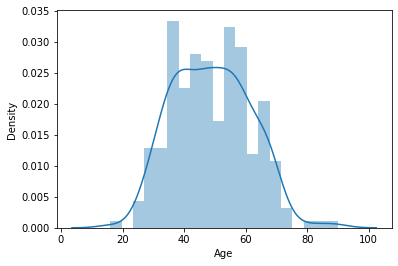

In [12]:
sns_plot = sns.distplot(data['Age'], bins=20)
fig = sns_plot.get_figure()

In [13]:
data.rename(str.lower, axis='columns', inplace=True)
print(data.columns.to_list())

['age', 'gender', 'polyuria', 'polydipsia', 'sudden weight loss', 'weakness', 'polyphagia', 'genital thrush', 'visual blurring', 'itching', 'irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'alopecia', 'obesity', 'class']


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 251 non-null    int64 
 1   gender              251 non-null    object
 2   polyuria            251 non-null    object
 3   polydipsia          251 non-null    object
 4   sudden weight loss  251 non-null    object
 5   weakness            251 non-null    object
 6   polyphagia          251 non-null    object
 7   genital thrush      251 non-null    object
 8   visual blurring     251 non-null    object
 9   itching             251 non-null    object
 10  irritability        251 non-null    object
 11  delayed healing     251 non-null    object
 12  partial paresis     251 non-null    object
 13  muscle stiffness    251 non-null    object
 14  alopecia            251 non-null    object
 15  obesity             251 non-null    object
 16  class               251 no

In [15]:
# data processing
df_diabetes = pd.get_dummies(data, drop_first=True, columns=['gender',  'polyuria',  'polydipsia', 'sudden weight loss',
                                                             'weakness', 'polyphagia', 'genital thrush', 'visual blurring',
                                                             'itching', 'irritability', 'delayed healing', 'partial paresis',
                                                             'muscle stiffness', 'alopecia', 'obesity',])
df_diabetes['class'] = np.where(df_diabetes['class'] == 'Positive', 1, 0)
df_diabetes.head()

,age,class,gender_Male,polyuria_Yes,polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,polyphagia_Yes,genital thrush_Yes,visual blurring_Yes,itching_Yes,irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,alopecia_Yes,obesity_Yes
0,40,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [16]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 519
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     251 non-null    int64
 1   class                   251 non-null    int64
 2   gender_Male             251 non-null    uint8
 3   polyuria_Yes            251 non-null    uint8
 4   polydipsia_Yes          251 non-null    uint8
 5   sudden weight loss_Yes  251 non-null    uint8
 6   weakness_Yes            251 non-null    uint8
 7   polyphagia_Yes          251 non-null    uint8
 8   genital thrush_Yes      251 non-null    uint8
 9   visual blurring_Yes     251 non-null    uint8
 10  itching_Yes             251 non-null    uint8
 11  irritability_Yes        251 non-null    uint8
 12  delayed healing_Yes     251 non-null    uint8
 13  partial paresis_Yes     251 non-null    uint8
 14  muscle stiffness_Yes    251 non-null    uint8
 15  alopecia_Yes           

In [17]:
df_diabetes.describe()

,age,class,gender_Male,polyuria_Yes,polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,polyphagia_Yes,genital thrush_Yes,visual blurring_Yes,itching_Yes,irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,alopecia_Yes,obesity_Yes
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,48.864542,0.689243,0.637450,0.525896,0.494024,0.414343,0.633466,0.466135,0.266932,0.442231,0.505976,0.282869,0.498008,0.446215,0.390438,0.358566,0.175299
std,12.526036,0.463728,0.481697,0.500327,0.500963,0.493592,0.482820,0.499849,0.443241,0.497644,0.500963,0.451293,0.500995,0.498092,0.488823,0.480538,0.380982
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
print(df_diabetes.columns.to_list())

['age', 'class', 'gender_Male', 'polyuria_Yes', 'polydipsia_Yes', 'sudden weight loss_Yes', 'weakness_Yes', 'polyphagia_Yes', 'genital thrush_Yes', 'visual blurring_Yes', 'itching_Yes', 'irritability_Yes', 'delayed healing_Yes', 'partial paresis_Yes', 'muscle stiffness_Yes', 'alopecia_Yes', 'obesity_Yes']


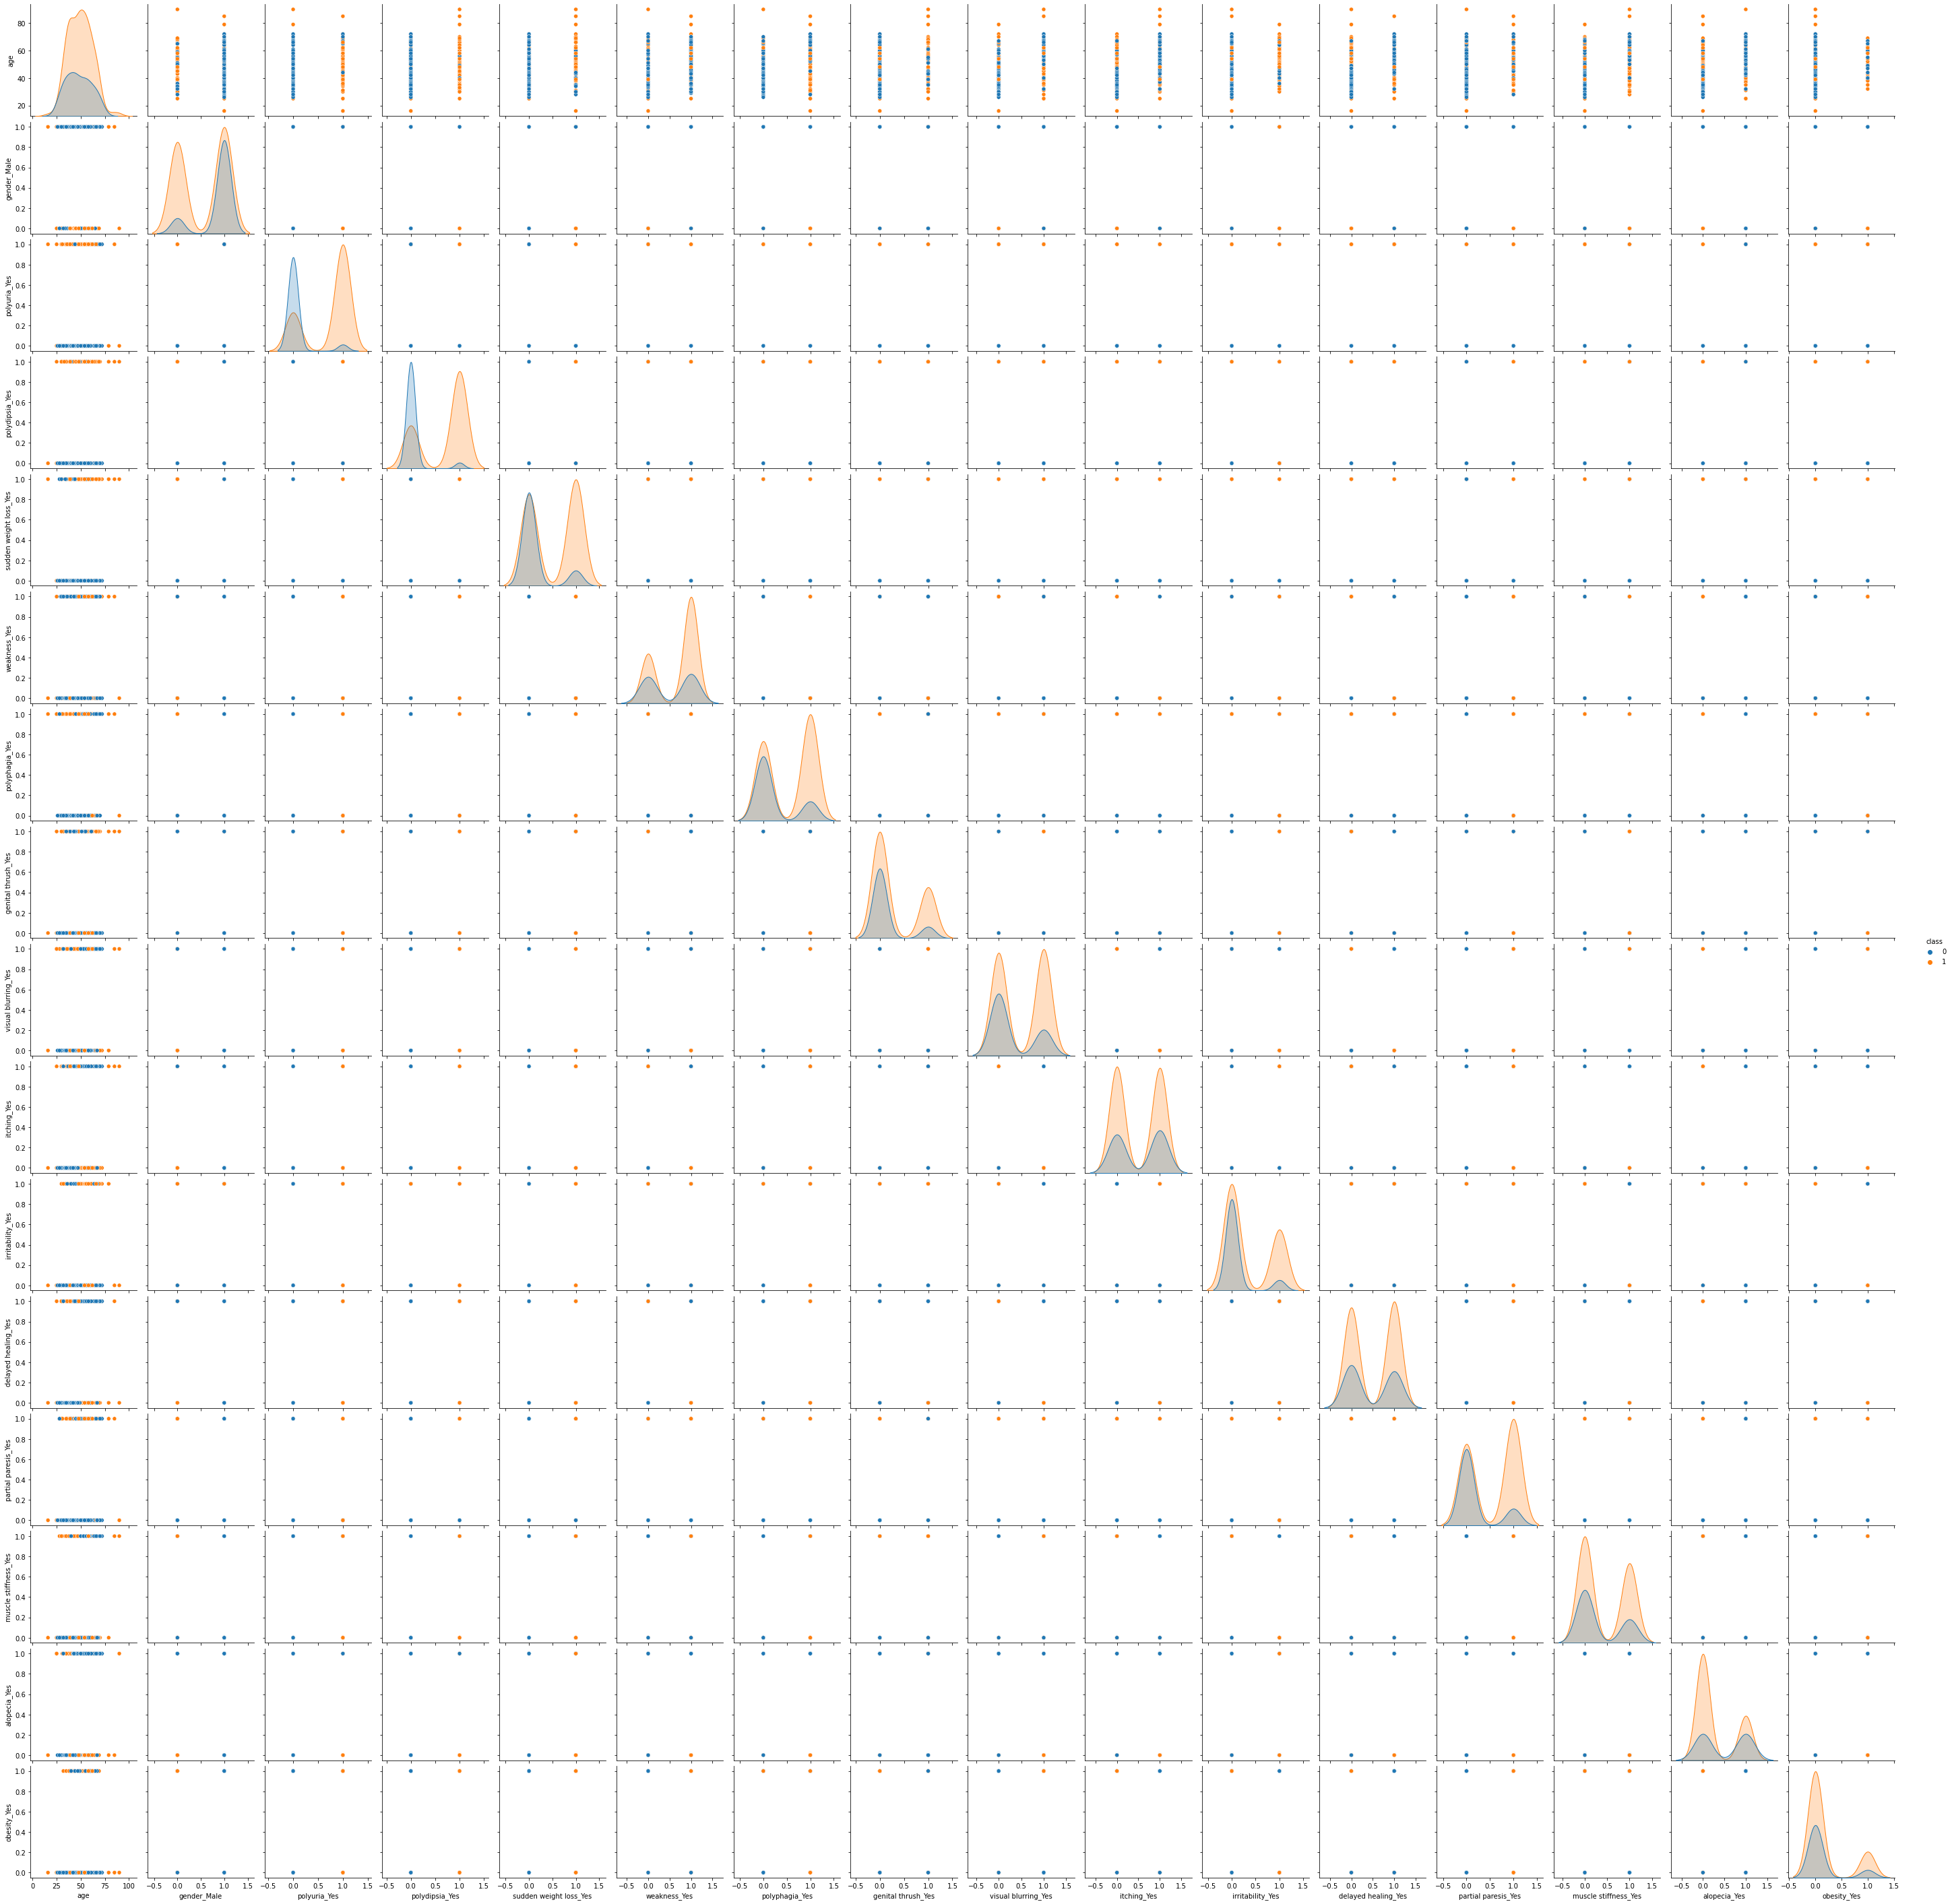

In [19]:
sns.pairplot(df_diabetes, hue='class')

<AxesSubplot:>

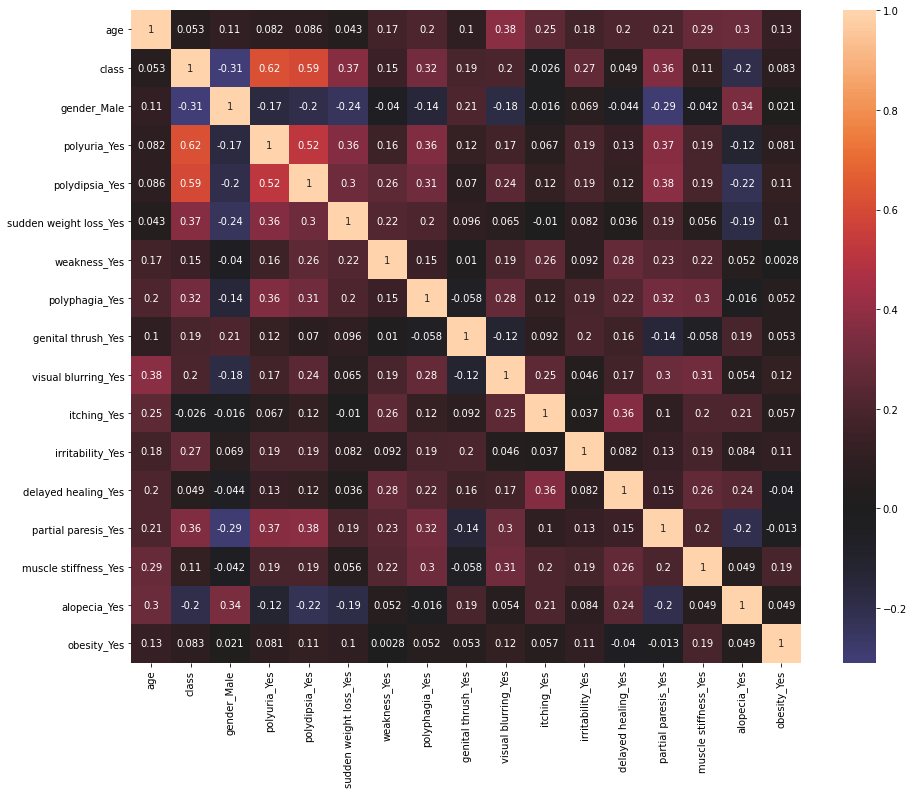

In [20]:
fig, ax = plt.subplots(figsize=(15,12))   
sns.heatmap(df_diabetes.corr(method='pearson'), center=0, square=False, annot=True, ax=ax)

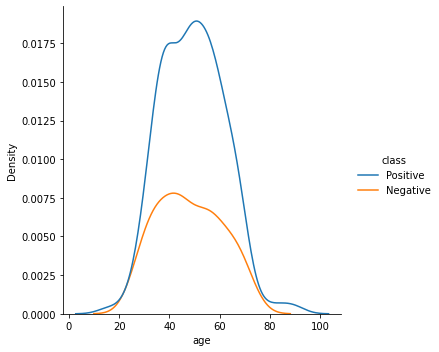

In [29]:
sns.displot(data=data, x='age', hue='class', kind='kde');

In [23]:
from scipy.stats import pointbiserialr
pointbiserialr(df_diabetes.iloc[:, 1], df_diabetes.age)

PointbiserialrResult(correlation=0.052634551937763764, pvalue=0.4063683568850133)

#### Findings
- Diabetes, especially type 2, is more common in males rather than females: https://www.news-medical.net/health/Diabetes-in-Men-versus-Women.aspx
- Target class strongly correlated with variables polyuria and polydipsia: https://www.jdrf.org/t1d-resources/about/symptoms/frequent-urination/
- Also class correlates with sudden weight loss: https://www.medicinenet.com/is_weight_loss_caused_by_diabetes_dangerous/ask.htm



### Modelling

In [30]:
rdm_state = 42
param_grid = {
    'n_estimators': np.arange(5, 51, 15),
    'max_depth': np.arange(5, 51, 15),
    'min_samples_split': np.arange(2, 11, 4),
    'min_samples_leaf': np.arange(1, 10, 4),
    'max_samples': np.arange(0.1, 0.99, 0.23), 
}
cv = 3

In [31]:
X = df_diabetes.drop('class', 1)
y = df_diabetes['class']

In [32]:
(X_train, 
 X_test, 
 y_train, y_test) = train_test_split(X, y, 
                                     test_size=0.25, 
                                     random_state=rdm_state, shuffle=True)

#### RFC

In [33]:
%%time
model_RFC = RandomForestClassifier(n_jobs=-1, random_state=rdm_state)
clf = GridSearchCV(model_RFC, param_grid, cv=cv)
clf.fit(X_train, y_train)
clf.best_params_

CPU times: user 2min 51s, sys: 15.8 s, total: 3min 7s
Wall time: 2min 57s


{'max_depth': 20,
 'max_samples': 0.56,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 35}

In [36]:
y_pred_RFC = clf.predict(X_test)

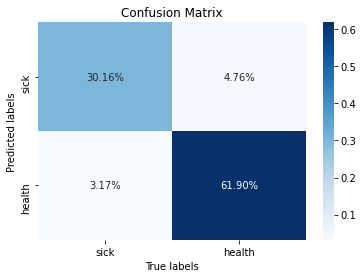

In [37]:
conf_mat = confusion_matrix(y_test, y_pred_RFC)

ax = plt.subplot()
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, 
            fmt='.2%', cmap='Blues', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('True labels');ax.set_ylabel('Predicted labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['sick', 'health']); ax.yaxis.set_ticklabels(['sick', 'health']);

In [43]:
print(f'f1 score - {round(100 * f1_score(y_test, y_pred_RFC), 2)}%,\nrecall score - {round(100* recall_score(y_test, y_pred_RFC), 2)}%')

f1 score - 93.98%,
recall score - 95.12%


### Save model

In [145]:
clf

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': array([ 5, 20, 35, 50]),
                         'max_samples': array([0.1 , 0.33, 0.56, 0.79]),
                         'min_samples_leaf': array([1, 5, 9]),
                         'min_samples_split': array([ 2,  6, 10]),
                         'n_estimators': array([ 5, 20, 35, 50])})

In [119]:
# Save to file in the current working directory
pkl_filename = "random_forest_diabet.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(clf, file)

### Load model

In [120]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X_test)

Test score: 92.06 %


In [121]:
y_pred_RFC = pickle_model.predict(X_test)